<a href="https://colab.research.google.com/github/hasin-abrar/Machine-Learning/blob/master/Titanic_V_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
np.random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics as sk_metric
from sklearn.preprocessing import OneHotEncoder

from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


* Remove Columns: Name, Ticket, Cabin
* Replace: Emabarked with number
* Preprocess -> Replace missing values with mode? 
* Standardize

In [ ]:
main_directory = '/content/drive/My Drive/Colab Notebooks/Titanic/Dataset/train.csv'
df = pd.read_csv(main_directory)
df.head()

In [ ]:
df_reduced = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df_reduced.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,male,27.0,0,0,13.00,S
887,888,1,1,female,19.0,0,0,30.00,S
888,889,0,3,female,NaN,1,2,23.45,S
889,890,1,1,male,26.0,0,0,30.00,C
890,891,0,3,male,32.0,0,0,7.75,Q


In [ ]:
change_sex = {'male':1, 'female':2}
change_emb = {'C':1, 'Q':2, 'S':3}
df_reduced = df_reduced.replace({'Sex':change_sex, 'Embarked':change_emb})

In [ ]:
# mean = df_reduced['Age'].mean()
# std = df_reduced['Age'].std()
# np.random.seed(1)
# change = lambda y: y if y>0 else df_reduced['Age'].min()

df_reduced['Pclass'].fillna(df_reduced.mode().iloc[0].Pclass, inplace=True)
df_reduced['Sex'].fillna(df_reduced.mode().iloc[0].Sex, inplace=True)
df_reduced['Age'].fillna(df_reduced['Age'].mean(), inplace = True)
df_reduced['SibSp'].fillna(df_reduced.mode().iloc[0].SibSp, inplace=True)
df_reduced['Parch'].fillna(df_reduced.mode().iloc[0].Parch, inplace=True)
df_reduced['Fare'].fillna(df_reduced['Fare'].mean(), inplace=True)
df_reduced['Embarked'].fillna(df_reduced.mode().iloc[0].Embarked, inplace=True)

(0.339, 8.378]       54
(8.378, 16.336]      46
(16.336, 24.294]    177
(24.294, 32.252]    346
(32.252, 40.21]     118
(40.21, 48.168]      70
(48.168, 56.126]     45
(56.126, 64.084]     24
(64.084, 72.042]      9
(72.042, 80.0]        2
Name: Age, dtype: int64


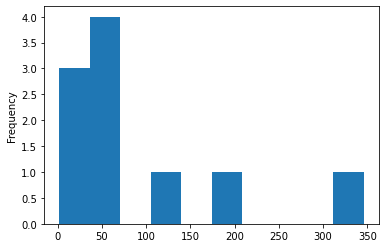

In [ ]:
print(df_reduced['Age'].value_counts(bins=10, ascending=False, sort= False) )
df_reduced['Age'].value_counts(bins=10, ascending=False, sort= False).plot(kind='hist')

In [ ]:
age = pd.DataFrame(df_reduced['Age'].value_counts(bins=10, ascending=False, sort= False) )
age_survive = pd.concat([age, df_reduced.Survived])
age_survive.describe()

(0.339, 8.378]       36
(8.378, 16.336]      19
(16.336, 24.294]     63
(24.294, 32.252]    117
(32.252, 40.21]      52
(40.21, 48.168]      24
(48.168, 56.126]     21
(56.126, 64.084]      9
(64.084, 72.042]      0
(72.042, 80.0]        1
Name: Age, dtype: int64

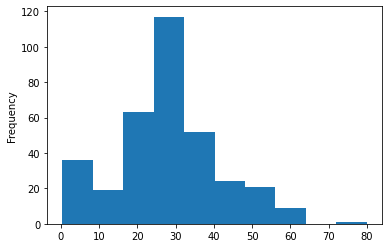

In [ ]:
age_surv = pd.concat([df_reduced.Age, df_reduced.Survived], axis=1)
age_only_surv = age_surv[age_surv.Survived==1]
age_not_syrv = age_surv[age_surv.Survived==0]
age_only_surv.Age.plot(kind='hist')
age_only_surv['Age'].value_counts(bins=10, ascending=False, sort= False)

(0.926, 8.3]     18
(8.3, 15.6]      16
(15.6, 22.9]     99
(22.9, 30.2]    235
(30.2, 37.5]     64
(37.5, 44.8]     45
(44.8, 52.1]     38
(52.1, 59.4]     15
(59.4, 66.7]     13
(66.7, 74.0]      6
Name: Age, dtype: int64

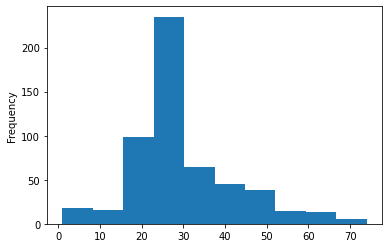

In [ ]:
age_not_syrv.Age.plot(kind='hist')
age_not_syrv['Age'].value_counts(bins=10, ascending=False, sort= False)

In [ ]:
temp = pd.concat([df_reduced.Age, df_reduced.Survived, df_reduced.Pclass], axis=1)
print(temp.groupby(['Survived','Pclass']).std())
print(temp.groupby(['Survived','Pclass']).mean())

                       Age
Survived Pclass           
0        1       14.766000
         2       11.742843
         3       10.596718
1        1       13.141263
         2       14.510680
         3       10.922065
                       Age
Survived Pclass           
0        1       40.896074
         2       33.266947
         3       27.417500
1        1       34.784615
         2       26.076166
         3       23.232689


In [ ]:
temp = pd.concat([df_reduced.Age, df_reduced.Survived, df_reduced.Embarked,df_reduced.Pclass,df_reduced.Sex], axis=1)
print('STD:\n',temp.groupby(['Survived','Sex','Embarked','Pclass']).std())
print('Mean:\n',temp.groupby(['Survived','Sex','Embarked','Pclass']).mean())
print('Count:\n',temp.groupby(['Survived','Sex','Embarked','Pclass']).count())

STD:
                                     Age
Survived Sex Embarked Pclass           
0        1   1.0      1       15.908507
                      2        4.080173
                      3        6.488063
             2.0      1             NaN
                      2             NaN
                      3       12.822167
             3.0      1       13.583568
                      2       11.949460
                      3       10.363613
         2   1.0      1             NaN
                      3       11.579818
             2.0      3        6.102076
             3.0      1       16.263456
                      2       12.915107
                      3       12.148156
1        1   1.0      1       12.461622
                      2       20.293341
                      3        9.523689
             2.0      3        0.403636
             3.0      1       15.395618
                      2       19.375524
                      3       11.535753
         2   1.0      1       12.3

* Replace categorical data with OnehotEncoder
* Use EDIT point of answer:
https://stackoverflow.com/questions/58101126/using-scikit-learn-onehotencoder-with-a-pandas-dataframe
* Auto-encoder: Use encoder part to draw a classification task from there
* correlation to find out relation
* try neural network at last on selective attributes

In [ ]:
df_reduced.groupby('Survived').mean()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,,
0,447.016393,2.531876,1.147541,30.415100,0.553734,0.329690,22.117887,2.641166
1,444.368421,1.950292,1.681287,28.549778,0.473684,0.464912,48.395408,2.368421


In [ ]:
df_reduced.groupby('Survived').agg(lambda x: pd.Series.mode(x)[0])

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,,
0,1,3,1,29.699118,0,0,8.05,3.0
1,2,1,2,29.699118,0,0,13.00,3.0


In [ ]:
df_reduced.groupby('Survived').std()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,,
0,260.640469,0.735805,0.354968,12.457370,1.288399,0.823166,31.388207,0.710081
1,252.358840,0.863321,0.466660,13.772498,0.708688,0.771712,66.596998,0.882510


In [ ]:
ohe_emb = OneHotEncoder(sparse=False)
transformed_emb = ohe_emb.fit_transform(df_reduced['Embarked'].to_numpy().reshape(-1,1))
# ohe_emb_df = pd.DataFrame(transformed_emb, columns=ohe_emb.get_feature_names())
ohe_emb_df = pd.DataFrame(transformed_emb, columns=['E_1', 'E_2','E_3'])
df_reduced_new = pd.concat([df_reduced, ohe_emb_df], axis = 1).drop('Embarked', axis = 1)


In [ ]:
ohe_sex = OneHotEncoder(sparse=False)
transformed_sex = ohe_sex.fit_transform(df_reduced_new['Sex'].to_numpy().reshape(-1,1))
# ohe_sex_df = pd.DataFrame(transformed_sex, columns=ohe_sex.get_feature_names())
ohe_sex_df = pd.DataFrame(transformed_sex, columns=['Sex_1', 'Sex_2'])
df_reduced_new = pd.concat([df_reduced_new, ohe_sex_df], axis = 1).drop('Sex', axis = 1)


In [ ]:
df_reduced_new.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,E_1,E_2,E_3,Sex_1,Sex_2
0,1,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,1.0,0.0
1,2,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,1.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0


In [ ]:
y = df_reduced_new.Survived
X = df_reduced_new.drop(['Survived','PassengerId','Age', 'SibSp', 'Parch','Fare'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2, random_state=123, stratify=y
)

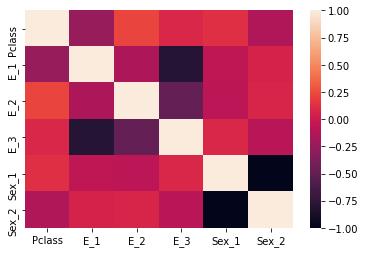

In [ ]:
# temp = pd.concat([df_reduced_new.Age, df_reduced_new.Fare], axis = 1)
corr = X_train.corr()
sns.heatmap(corr)
# temp.head()

In [ ]:
temp = pd.concat([X_train,y_train],axis = 1)
# temp.head()
sns.lmplot(x='Age', y='Fare',data=temp, hue = 'Survived')

In [ ]:
X_train.describe()

,Pclass,Fare,E_1,E_2,E_3,Sex_1,Sex_2
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.334270,31.437616,0.196629,0.080056,0.723315,0.646067,0.353933
std,0.823737,50.599913,0.397729,0.271571,0.447674,0.478525,0.478525
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,14.454200,0.000000,0.000000,1.000000,1.000000,0.000000
75%,3.000000,30.178100,0.000000,0.000000,1.000000,1.000000,1.000000
max,3.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100))
hyperparameters = {'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'],
                   'randomforestregressor__max_depth': [None, 5,3,1]}

In [ ]:
clf = GridSearchCV(pipeline,hyperparameters,cv=10)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                            

In [ ]:
print(clf.best_params_)
y_pred = np.around(clf.predict(X_test))
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test,y_pred))

{'randomforestregressor__max_depth': 3, 'randomforestregressor__max_features': 'auto'}
0.19815546772068504
0.18994413407821228


In [ ]:
from sklearn.svm import SVC
pipeline = make_pipeline(preprocessing.StandardScaler(), SVC(random_state=1))
hyperparameters = {'svc__kernel': ['linear', 'rbf', 'sigmoid']}
clf = GridSearchCV(pipeline,hyperparameters,cv=10)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False, random_state=1,
                                            shrinking=True, tol=0.001,
                                    

In [ ]:
print(clf.best_params_)
y_pred = np.around(clf.predict(X_test))
from sklearn.metrics import confusion_matrix
y_test_arr = y_test.to_numpy()
cm = confusion_matrix(y_test_arr, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

{'svc__kernel': 'rbf'}
[[103   7]
 [ 27  42]]
0.8100558659217877
